In [1]:
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 25.0.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 25.0.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


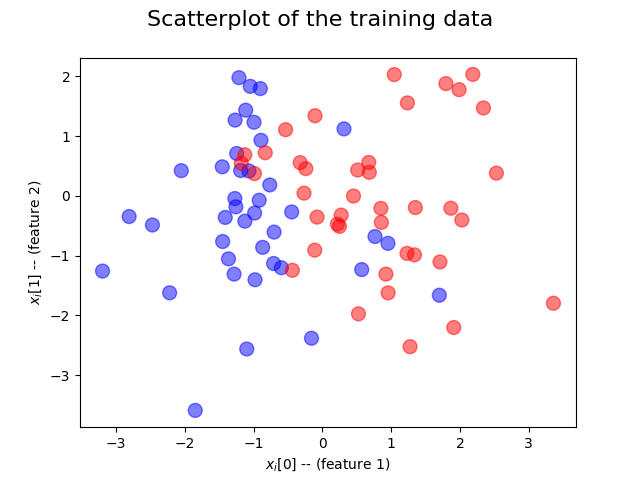

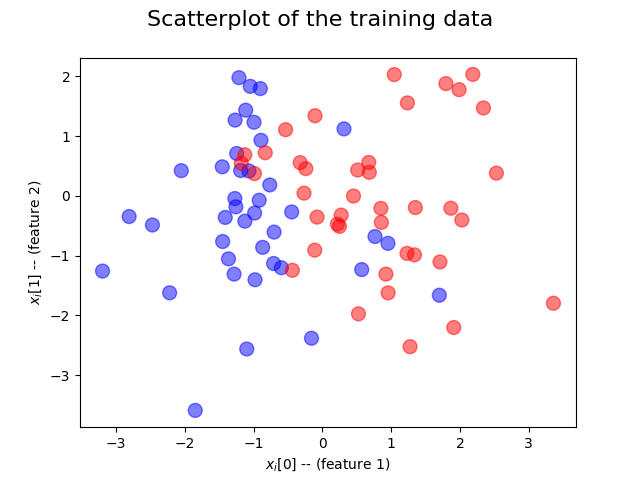

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
np.random.seed(0)
import random

n = 100
X, Y = make_classification(n_samples = n, n_features=2, n_redundant=0, n_informative=2, flip_y=0.2)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

train_x, test_x = np.split(X, [n*8//10])
train_labels, test_labels = np.split(Y, [n*8//10])

def plot_dataset(suptitle, features, labels):
    fig, ax = plt.subplots(1, 1)
    fig.suptitle(suptitle, fontsize=16)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:,0], features[:,1], marker='o', c= colors, s=100, alpha =0.5)
    fig.show()

plot_dataset('Scatterplot of the training data', train_x,train_labels)


In [4]:
def plot_loss_functions(suptitle, functions, ylabels, xlabel):
    fig, ax = plt.subplots(1,len(functions), figsize=(9,3))
    plt.subplots_adjust(bottom=0.2, wspace=0.4)
    fig.suptitle(suptitle)
    for i, fun in enumerate(functions):
        ax[i].set_xlabel(xlabel)
        if len(ylabels) > i:
            ax[i].set_ylabel(ylabels[i])
        ax[i].plot(x, fun)
    plt.show
        

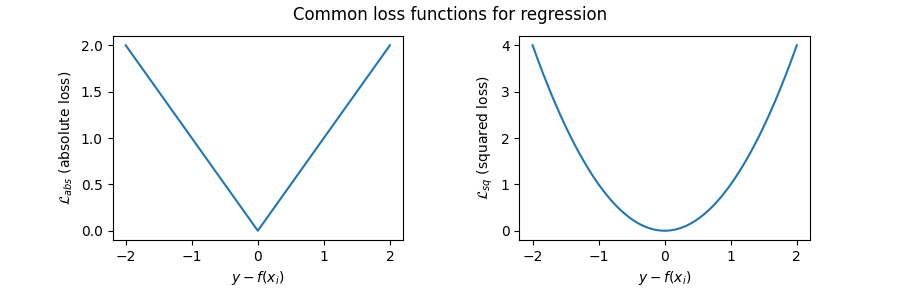

In [5]:

x = np.linspace(-2, 2, 101)
plot_loss_functions(
    suptitle='Common loss functions for regression',
    functions=[np.abs(x), np.power(x, 2)],
    ylabels=['$\mathcal{L}_{abs}$ (absolute loss)', '$\mathcal{L}_{sq}$ (squared loss)'],
    xlabel='$y - f(x_i)$'
)

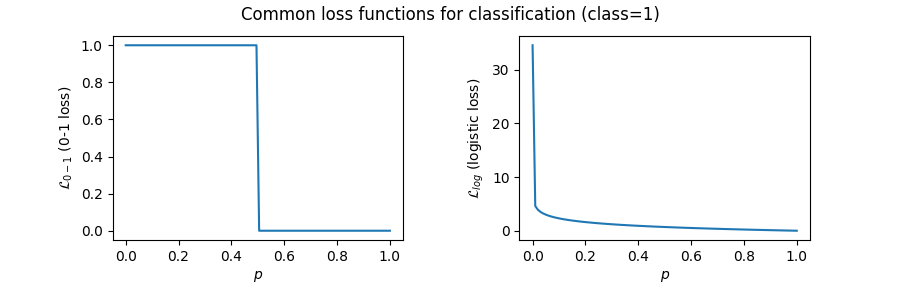

In [10]:
epsilon = 1e-15
x = np.linspace(epsilon,1,100)
def zero_one(d):
    if d < 0.5:
        return 1
    return 0
zero_one_v = np.vectorize(zero_one)

def logistic_loss(fx):
    return -np.log(fx)


plot_loss_functions(suptitle = 'Common loss functions for classification (class=1)',
                   functions = [zero_one_v(x), logistic_loss(x)],
                   ylabels    = ['$\mathcal{L}_{0-1}$ (0-1 loss)',
                                 '$\mathcal{L}_{log}$ (logistic loss)'],
                   xlabel     = '$p$')

In [ ]:
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        
    def forward(self, x):
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db 
net = Linear(2,2)
net.forward(train_x[0:5])    

array([[ 1.77202116, -0.25384488],
       [ 0.28370828, -0.39610552],
       [-0.30097433,  0.30513182],
       [-0.8120485 ,  0.56079421],
       [-1.23519653,  0.3394973 ]])

In [ ]:
class Softmax:
    def forward(self,z):
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z
    
    def backward(self, dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p *pdp.sum(axis=2, keepdims=True)
    
    
softmax = Softmax()
softmax.forward(net.forward(train_x[0:10]))

array([[0.88348621, 0.11651379],
       [0.66369714, 0.33630286],
       [0.35294795, 0.64705205],
       [0.20216095, 0.79783905],
       [0.17154828, 0.82845172],
       [0.24279153, 0.75720847],
       [0.18915732, 0.81084268],
       [0.17282951, 0.82717049],
       [0.13897531, 0.86102469],
       [0.72746882, 0.27253118]])

In [14]:
def plot_cross_ent():
    p = np.linspace(0.01,0.99, 101)
    cross_ent_v = np.vectorize(cross_ent)
    f3, ax = plt.subplots(1,1, figsize=(8,3))
    l1, = plt.plot(p, cross_ent_v(p,1), 'r--')
    l2, = plt.plot(p, cross_ent_v(p, 0), 'r-')
    plt.legend([l1,l2], ['$y = 1$', '$y = 0$'], loc = 'upper center', ncol = 2)
    plt.xlabel('$\hat{p}(y|x)$', size=18)
    plt.ylabel('$\mathcal{L}_{CE}$', size=18)
    plt.show()

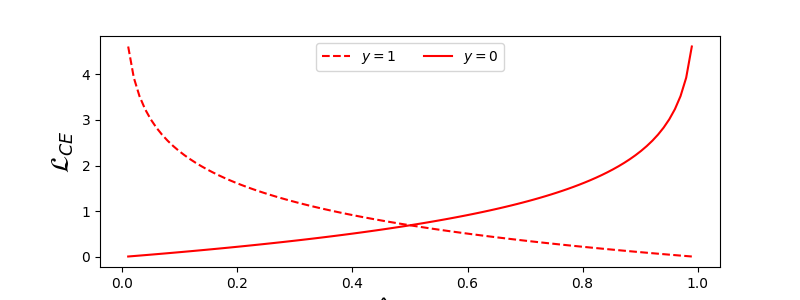

In [ ]:
def cross_ent(prediction, ground_truth):
    t = 1 if ground_truth > 0.5 else 0
    return -t * np.log(prediction) - (1 - t) * np.log(1 - prediction)
plot_cross_ent()

In [ ]:
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()
    
    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax/self.p
    
cross_ent_loss = CrossEntropyLoss()
p = softmax.forward(net.forward(train_x[0:10]))
cross_ent_loss.forward(p, train_labels[0:10])    

np.float64(1.429664938969559)